In [122]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import shapely
import pysal as ps
from fiona.crs import from_epsg
from pandas import DataFrame
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pylab as plt
import datetime as dt
from matplotlib import colors

Home = os.getenv('HOME')
PUIdata = Home + '/PUIdata'
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
# import census tract shape file and assign index using track number

shape_path=PUIdata + "/Lab9_SRK325/Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [5]:
# import citibike montly data

df_bike_monthly=DataFrame.from_csv(PUIdata + '/Lab9_SRK325/Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# create a column for month numbers

df_bike_monthly['month'] = df_bike_monthly.index.month

In [49]:
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,month
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,7
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,8
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,9
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,10
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,11


In [53]:
# for the summer season analysis use months of June, July and August

df_bike_summer = df_bike_monthly[df_bike_monthly['month'].isin([6, 7, 8])]
df_bike_summer.drop('month', axis=1, inplace=True)
df_bike_summer.head()

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2014-06-30,2048,3306,9626,3515,7255,2942,1917,3702,3694,2422,...,0,0,0,0,0,0,0,0,0,0
2014-07-31,2252,3216,9825,3509,7014,3224,2195,3732,4042,2268,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,2179,3004,10196,3573,7328,3311,2213,4078,4011,2168,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# for the winter season use the months of December, January, and February

df_bike_winter = df_bike_monthly[df_bike_monthly['month'].isin([12, 1, 2])]
df_bike_winter.drop('month', axis=1, inplace=True)
df_bike_winter.head()

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,0
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,1052,1304,4501,1783,2985,2091,779,2108,1636,878,...,0,0,0,0,0,0,0,0,0,0
2015-01-31,833,0,3186,1248,1992,1429,442,1499,1366,619,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#input citibike station locations and convert station_ids to string index

station_id=DataFrame.from_csv(PUIdata + '/Lab9_SRK325/Data/Station_id.csv')
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


In [56]:
# convert lat and lon to columns to a geometry column geopandas

station_id['lonlat']=zip(station_id.lon,station_id.lat)
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


In [57]:
# overlay stations on census tracks to assign locations

a=[]
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [58]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

In [59]:
# Create average monthly rides column by season from monthly citibike data and add it to the station id which has the geometry

station_id['Summer_MonthlyAve']=df_bike_summer.sum()
station_id['Winter_MonthlyAve']=df_bike_winter.sum()

In [60]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,Summer_MonthlyAve,Winter_MonthlyAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,22422,9456
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,32869,11373
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,87375,36543
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,33018,14170
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,59890,21889


In [61]:
# add summer monthly rides to ct shapefile

temp=station_id[['Summer_MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_summer=ct_shape.join(temp)
ct_shape_summer.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [63]:
ct_shape_summer_zoom=(ct_shape_summer[ct_shape_summer
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

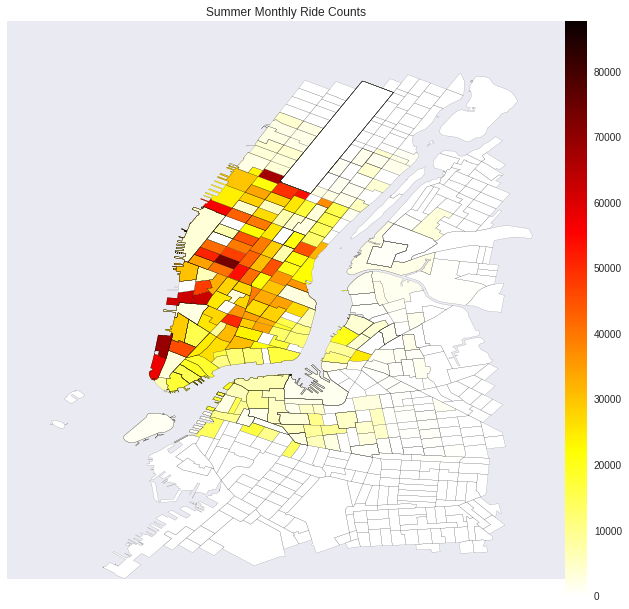

In [176]:
# plot summer heatmap

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_summer_zoom.plot(column='Summer_MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Summer Monthly Ride Counts")

vmin = min(ct_shape_summer_zoom['Summer_MonthlyAve'])
vmax = max(ct_shape_summer_zoom['Summer_MonthlyAve'])

fig = ax.get_figure()
cax = fig.add_axes([.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

### Figure 1 - Heatmap of Average Monthly Riders for Summer from 2014-2016

In [66]:
# add winter monthly rides to ct shapefile

temp=station_id[['Winter_MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_winter=ct_shape.join(temp)
ct_shape_winter.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [67]:
# zoom in shapefile for plotting

ct_shape_winter_zoom=(ct_shape_winter[ct_shape_winter
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

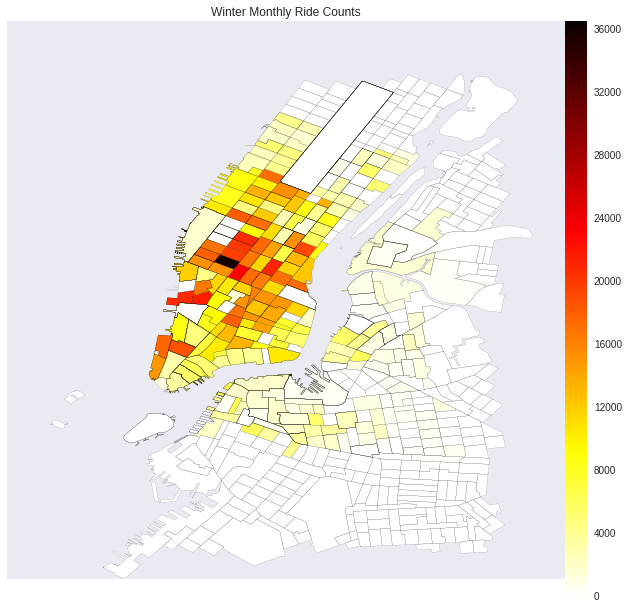

In [178]:
# plot winter heatmap

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_winter_zoom.plot(column='Winter_MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Winter Monthly Ride Counts")

vmin = min(ct_shape_winter_zoom['Winter_MonthlyAve'])
vmax = max(ct_shape_winter_zoom['Winter_MonthlyAve'])

fig = ax.get_figure()
cax = fig.add_axes([.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax)

### Figure 2 - Heatmap of Average Monthly Riders for Winter from 2014-2016

In [73]:
# save summer shapefile

path_summer=PUIdata + '/Lab9_SRK325/Output/ct_shape_summer_zoom.shp'
ct_shape_summer_zoom.to_file(path)

In [74]:
# save winter shapefile

path_winter=PUIdata + '/Lab9_SRK325/Output/ct_shape_winter_zoom.shp'
ct_shape_winter_zoom.to_file(path)

In [78]:
qW_CT_summer=ps.queen_from_shapefile(path_summer)

qW_CT_summer.transform = 'r'

MonthlyRide_Summer = ct_shape_summer_zoom.Summer_MonthlyAve
MonthlyRideLag_Summer = ps.lag_spatial(qW_CT_summer, MonthlyRide_Summer)

MonthlyRideLagQ10_Summer = ps.Quantiles(MonthlyRideLag_Summer, k=10)

('Island id: ', [0])
('WARNING: ', 0, ' is an island (no neighbors)')


In [81]:
qW_CT_winter = ps.queen_from_shapefile(path_winter)

qW_CT_winter.transform = 'r'

MonthlyRide_Winter = ct_shape_winter_zoom.Winter_MonthlyAve
MonthlyRideLag_Winter = ps.lag_spatial(qW_CT_winter, MonthlyRide_Winter)

MonthlyRideLagQ10_Winter = ps.Quantiles(MonthlyRideLag_Winter, k=10)

('Island id: ', [0])
('WARNING: ', 0, ' is an island (no neighbors)')


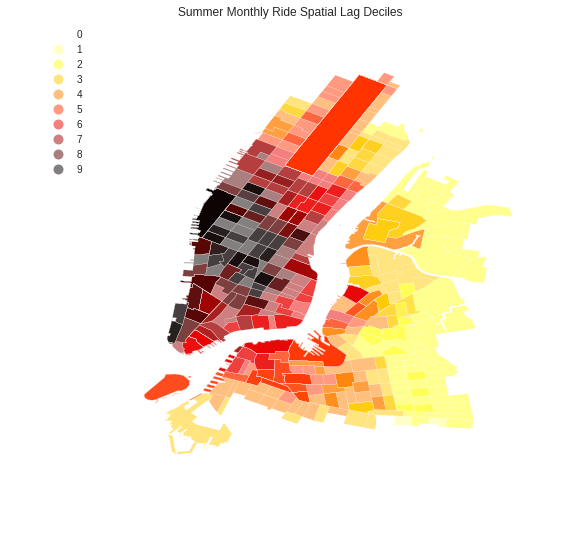

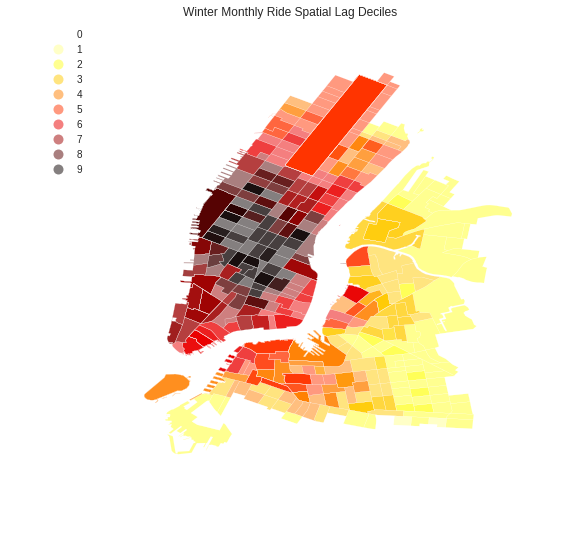

In [179]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_summer_zoom.assign(cl=MonthlyRideLagQ10_Summer.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer Monthly Ride Spatial Lag Deciles")

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_winter_zoom.assign(cl=MonthlyRideLagQ10_Winter.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Monthly Ride Spatial Lag Deciles")

### Figure 3 - Map of Monthly Ride Spatial Lag Deciles for Summer and Winter. Spatial lag measures the degree of which the value of a dependent variable is influenced by its neighboring values.

In [83]:
# find slope and intercept of line for summer data points

b,a = np.polyfit(MonthlyRide_Summer, MonthlyRideLag_Summer, 1)
b,a 

(0.64335490815356511, 4220.5552980795601)

In [85]:
# find slope and intercept of line for summer data points

d,c = np.polyfit(MonthlyRide_Winter, MonthlyRideLag_Winter, 1)
d,c 

(0.66023249858156818, 1600.8324238675889)

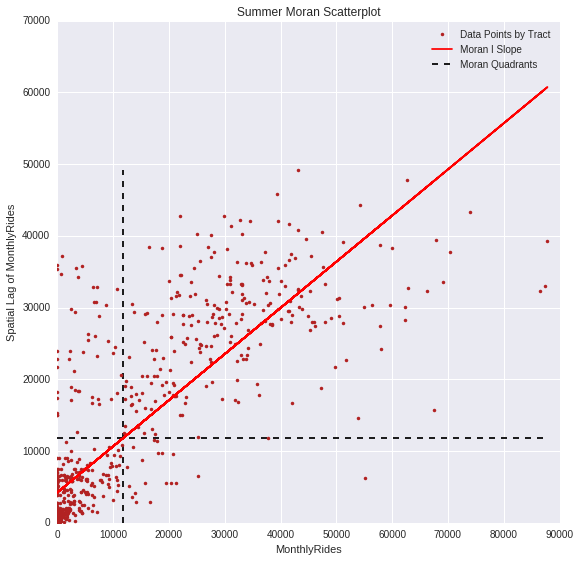

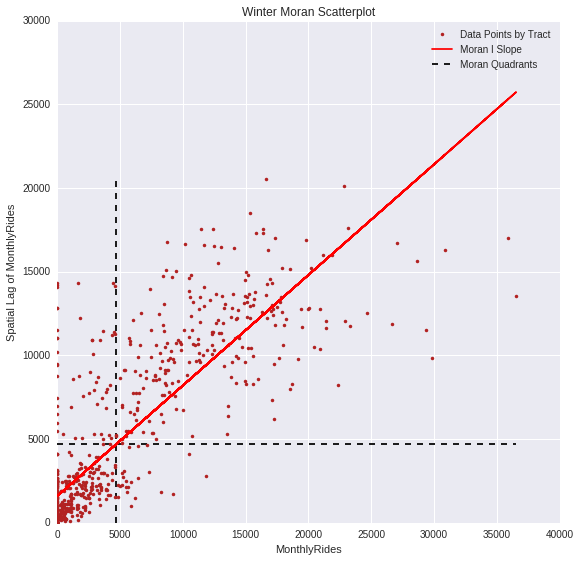

In [183]:
# plot summer moran scatterplot

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_Summer, MonthlyRideLag_Summer, '.', color='firebrick', label='Data Points by Tract')

plt.vlines(MonthlyRide_Summer.mean(), MonthlyRideLag_Summer.min(), MonthlyRideLag_Summer.max(), linestyle='--', label='Moran Quadrants')
plt.hlines(MonthlyRideLag_Summer.mean(), MonthlyRide_Summer.min(), MonthlyRide_Summer.max(), linestyle='--')

plt.plot(MonthlyRide_Summer, a + b*MonthlyRide_Summer, 'r', label='Moran I Slope')
plt.title('Summer Moran Scatterplot')
plt.legend()
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

# plot winter moran scatterplot

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide_Winter, MonthlyRideLag_Winter, '.', color='firebrick', label='Data Points by Tract')

plt.vlines(MonthlyRide_Winter.mean(), MonthlyRideLag_Winter.min(), MonthlyRideLag_Winter.max(), linestyle='--', label='Moran Quadrants')
plt.hlines(MonthlyRideLag_Winter.mean(), MonthlyRide_Winter.min(), MonthlyRide_Winter.max(), linestyle='--')

plt.plot(MonthlyRide_Winter, c + d*MonthlyRide_Winter, 'r', label='Moran I Slope')
plt.title('Winter Moran Scatterplot')
plt.legend()
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

### Figure 4 - Moran Scatterplots for Summer and Winter. The upper right quadrant indicates hotspot data points, while the low left quadrant indicates coldspot data points

In [88]:
# calculate Moran I and p-value for Summer

I_MonthlyRide_Summer = ps.Moran(MonthlyRide_Summer, qW_CT_summer)

I_MonthlyRide_Summer.I, I_MonthlyRide_Summer.p_sim

(0.64353398667011008, 0.001)

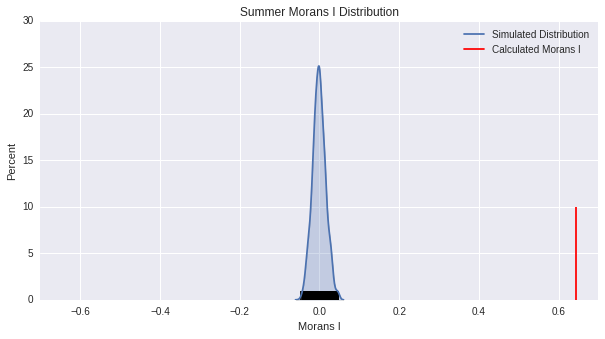

In [188]:

plt.rcParams['figure.figsize']=(10,5)

sns.kdeplot(I_MonthlyRide_Summer.sim, shade=True, label='Simulated Distribution')
plt.vlines(I_MonthlyRide_Summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_Summer.I, 0, 10, 'r', label='Calculated Morans I')
plt.xlim([-.70, .70])

plt.title('Summer Morans I Distribution')
plt.legend()
plt.ylabel('Percent')
plt.xlabel('Morans I')

### Figure 5 - Morans I Distribution for Summer, which shows the calculated value with a p-value of 0.001

In [93]:
# calculate Moran I and p-value for Winter

I_MonthlyRide_Winter = ps.Moran(MonthlyRide_Winter, qW_CT_winter)

I_MonthlyRide_Winter.I, I_MonthlyRide_Winter.p_sim

(0.66039156431885593, 0.001)

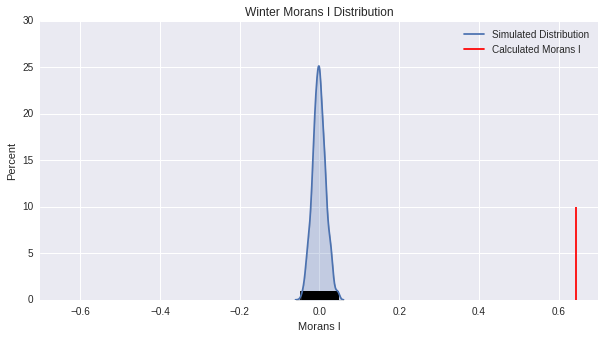

In [189]:
plt.rcParams['figure.figsize']=(10,5)

sns.kdeplot(I_MonthlyRide_Summer.sim, shade=True, label='Simulated Distribution')
plt.vlines(I_MonthlyRide_Summer.sim, 0, 1)
plt.vlines(I_MonthlyRide_Summer.I, 0, 10, 'r', label='Calculated Morans I')
plt.xlim([-.70, .70])

plt.title('Winter Morans I Distribution')
plt.legend()
plt.ylabel('Percent')
plt.xlabel('Morans I')

### Figure 6 - Morans I Distribution for Summer, which shows the calculated value with a p-value of 0.001

In [96]:
LMo_MonthlyRide_Summer = ps.Moran_Local(MonthlyRide_Summer, qW_CT_summer, permutations=999)

sigs_summer = MonthlyRide_Summer[LMo_MonthlyRide_Summer.p_sim <= .001]
W_sigs_summer = MonthlyRideLag_Summer[LMo_MonthlyRide_Summer.p_sim <= .001]
insigs_summer = MonthlyRide_Summer[LMo_MonthlyRide_Summer.p_sim > .001]
W_insigs_summer = MonthlyRideLag_Summer[LMo_MonthlyRide_Summer.p_sim > .001]

In [108]:
LMo_MonthlyRide_Winter = ps.Moran_Local(MonthlyRide_Winter, qW_CT_winter, permutations=999)

sigs_winter = MonthlyRide_Winter[LMo_MonthlyRide_Winter.p_sim <= .001]
W_sigs_winter = MonthlyRideLag_Winter[LMo_MonthlyRide_Winter.p_sim <= .001]
insigs_winter = MonthlyRide_Winter[LMo_MonthlyRide_Winter.p_sim > .001]
W_insigs_winter = MonthlyRideLag_Winter[LMo_MonthlyRide_Winter.p_sim > .001]

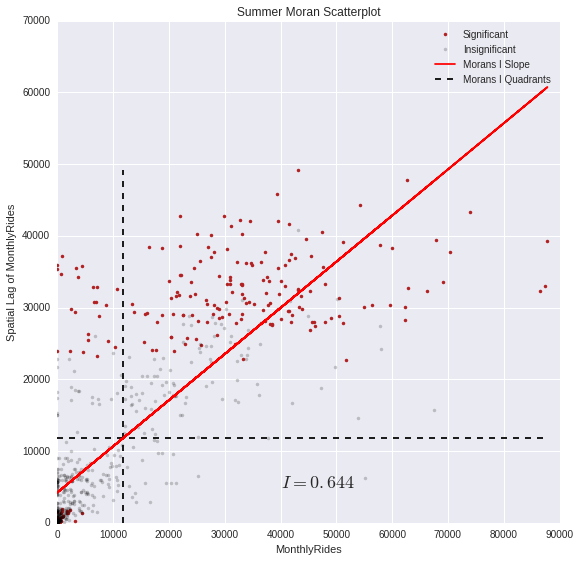

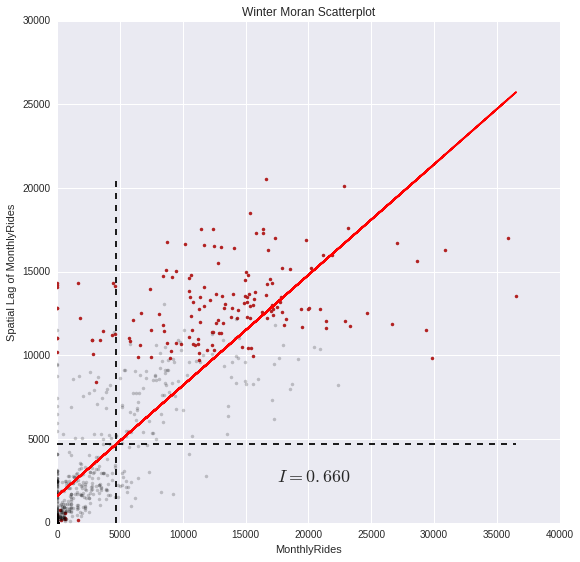

In [191]:
# Morans I plot including significance for Summer

f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs_summer, W_sigs_summer, '.', color='firebrick', label='Significant')
plt.plot(insigs_summer, W_insigs_summer, '.k', alpha=.2, label='Insignificant')
plt.text(s='$I = %.3f$' % I_MonthlyRide_Summer.I, x=40000, y=5000, fontsize=18)

plt.vlines(MonthlyRide_Summer.mean(), MonthlyRideLag_Summer.min(), MonthlyRideLag_Summer.max(), linestyle='--', label='Morans I Quadrants')
plt.hlines(MonthlyRideLag_Summer.mean(), MonthlyRide_Summer.min(), MonthlyRide_Summer.max(), linestyle='--')

plt.plot(MonthlyRide_Summer, a + b*MonthlyRide_Summer, 'r', label='Morans I Slope')
plt.title('Summer Moran Scatterplot')
plt.legend()
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

# Morans I plot including significance for Winter

f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs_winter, W_sigs_winter, '.', color='firebrick', label='Significant')
plt.plot(insigs_winter, W_insigs_winter, '.k', alpha=.2, label='Insignificant')
plt.text(s='$I = %.3f$' % I_MonthlyRide_Winter.I, x=17500, y=2500, fontsize=18)

plt.vlines(MonthlyRide_Winter.mean(), MonthlyRideLag_Winter.min(), MonthlyRideLag_Winter.max(), linestyle='--', label='Morans I Quadrants')
plt.hlines(MonthlyRideLag_Winter.mean(), MonthlyRide_Winter.min(), MonthlyRide_Winter.max(), linestyle='--')

plt.plot(MonthlyRide_Winter, c + d*MonthlyRide_Winter, 'r', label='Morans I Slope')
plt.title('Winter Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

### Figure 7 - Morans Plot of Significant Local Indicators of Spacial Autocorrelation (LISA)

In [120]:
sig_summer = LMo_MonthlyRide_Summer.p_sim < 0.01
hotspots_summer = LMo_MonthlyRide_Summer.q==1 * sig_summer
coldspots_summer = LMo_MonthlyRide_Summer.q==3 * sig_summer
print "Number of Summer Hotspots:", hotspots_summer.sum()
print "Number of Summer Coldspots:", coldspots_summer.sum()

Number of Summer Hotspots: 189
Number of Summer Coldspots: 242


In [121]:
sig_winter = LMo_MonthlyRide_Winter.p_sim < 0.01
hotspots_winter = LMo_MonthlyRide_Winter.q==1 * sig_winter
coldspots_winter = LMo_MonthlyRide_Winter.q==3 * sig_winter
print "Number of Winter Hotspots:", hotspots_winter.sum()
print "Number of Winter Coldspots:", coldspots_winter.sum()

Number of Winter Hotspots: 193
Number of Winter Coldspots: 208


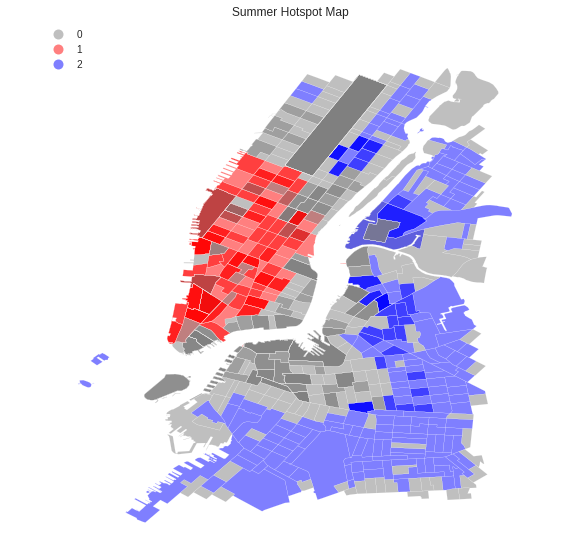

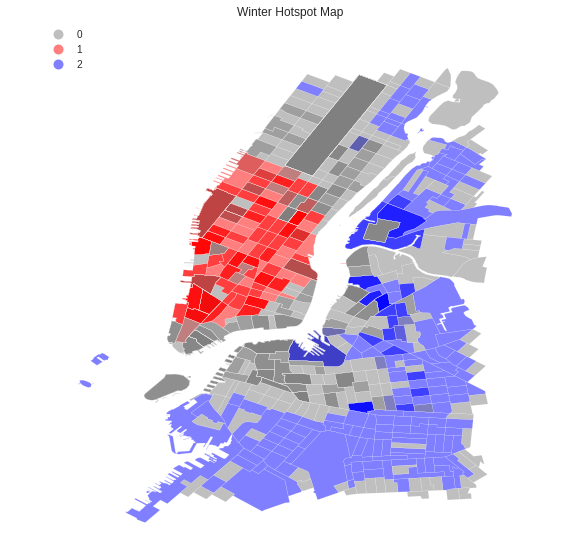

In [192]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_summer = hotspots_summer*1 + coldspots_summer*2
hotcold_winter = hotspots_winter*1 + coldspots_winter*2

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_summer_zoom.assign(cl=hotcold_summer).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer Hotspot Map")

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_winter_zoom.assign(cl=hotcold_winter).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter Hotspot Map")

### Figure 8 - Visualization of LISA Hotspot Map. Red areas indicate hotspots, while blue indicate coldspots

In [151]:
# create datafram to compare summer and winter hotspots

columns = ['BoroCT2010', 'summer', 'winter', 'compare']
index = ct_shape_summer_zoom.index.astype(str)

hotspot_compare = pd.DataFrame(index=index, columns=columns)
hotspot_compare['BoroCT2010'] = hotspot_compare.index
hotspot_compare['summer'] = hotcold_summer
hotspot_compare['winter'] = hotcold_winter

hotspot_compare['compare'] = hotspot_compare['summer'] - hotspot_compare['winter']

hotspot_compare.head()

,BoroCT2010,summer,winter,compare
BoroCT2010,,,,
1000100,1000100,2,2,0
1000201,1000201,0,0,0
1000202,1000202,0,0,0
1000202,1000202,0,0,0
1000202,1000202,0,0,0


In [152]:
hotspot_compare['compare'].unique()

array([ 0,  1, -1,  2, -2])

In [144]:
# add comparison column to shapefile

ct_shape_compare = ct_shape_summer_zoom.join(hotspot_compare['compare'])
ct_shape_compare.fillna(0,inplace=True)

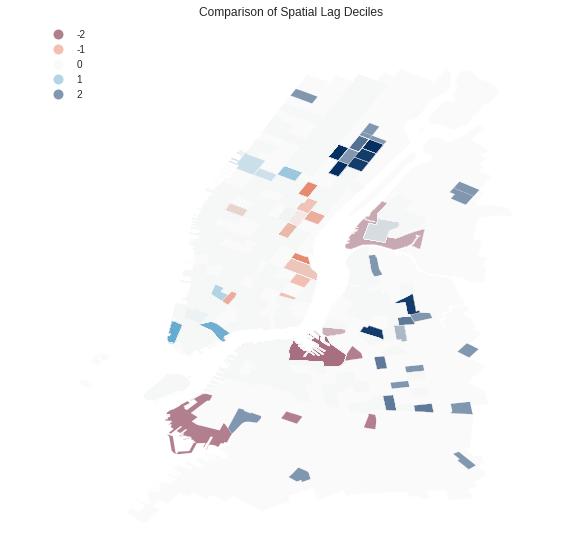

In [166]:
# plot of comparison

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_compare.plot(column='compare', categorical=True, 
        cmap='RdBu', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Comparison of Spatial Lag Deciles")

## Figure 9 - Visualization of Changing LISA hotspots. 

### -2 indicates change from insignificant to hotspot from summer to winter;
### -1 incidates change from hotspot to coldspot from summer to winter;
### Zero indicates no change; 
### 1 incidates change from coldspot to hotspot from summer to winter;
### 2 indicates change from insignificant to coldspot from summer to winter;
